In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [45]:
dataset1_path =r'C:\Users\mouli\Downloads\archive\EV Maker by Place.csv'
dataset2_path =r'C:\Users\mouli\Downloads\archive\ev_sales_by_makers_and_cat_15-24.csv'
dataset3_path =r'C:\Users\mouli\Downloads\archive\OperationalPC.csv'


In [46]:
ev_by_place = pd.read_csv(dataset1_path)
ev_sales = pd.read_csv(dataset2_path)
operational_pc = pd.read_csv(dataset3_path)

In [47]:
# Display first few rows of each dataset
print("Dataset 1 - EV Maker by Place:\n", ev_by_place.head())
print("\nDataset 2 - EV Sales by Category:\n", ev_sales.head())
print("\nDataset 3 - Operational Charging Stations:\n", operational_pc.head())


Dataset 1 - EV Maker by Place:
             EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu

Dataset 2 - EV Sales by Category:
   Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578  

Dataset 3 - Operational 

In [48]:
# K-Means Clustering for Geographic Analysis
print("\nPerforming K-Means clustering on Operational Charging Stations...")


Performing K-Means clustering on Operational Charging Stations...


In [49]:
# Preprocessing: Select relevant columns
kmeans_data = operational_pc[['State', 'No. of Operational PCS']]
kmeans_data['Charging Stations'] = kmeans_data['No. of Operational PCS']


In [50]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_data['Cluster'] = kmeans.fit_predict(kmeans_data[['Charging Stations']])

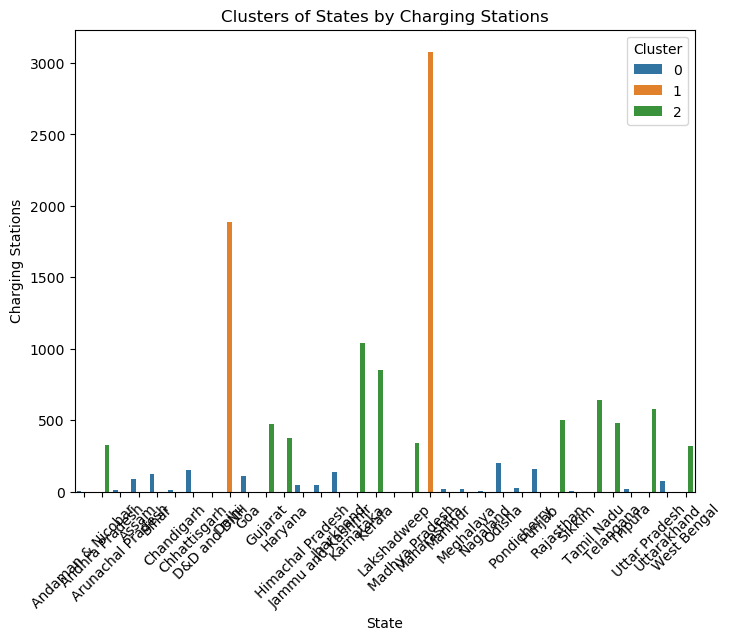

In [51]:
import os

# Ensure the 'outputs' directory exists
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Plot clustering results
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Charging Stations', hue='Cluster', data=kmeans_data)
plt.xticks(rotation=45)
plt.title('Clusters of States by Charging Stations')

# Save the plot to the 'outputs' directory
plt.savefig('outputs/clusters_by_state.png')

# Show the plot
plt.show()



Analyzing EV Sales Trends (2015-2024)...
  Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578  
  Cat                          Maker  Year  Sales
0  3W    "VOLVO GROUP INDIA PVT LTD"  2015      0
1  3W         3EV INDUSTRIES PVT LTD  2015      0
2  2W         3GB TECHNOLOGY PVT LTD  2015      0
3  3W         3GB TECHNOLOGY PVT LTD  2015      0
4  3W  3S INDUSTRIES PRIVATE LIMITED  2015      0


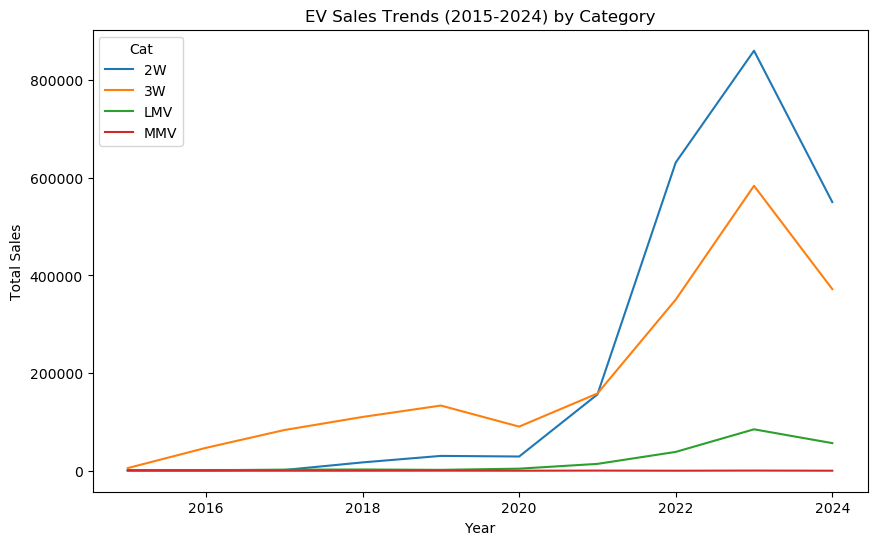

In [52]:
# Sales Trends Analysis
print("\nAnalyzing EV Sales Trends (2015-2024)...")
print(ev_sales.head())

ev_sales_long = ev_sales.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')

ev_sales_long['Year'] = ev_sales_long['Year'].astype(int)

print(ev_sales_long.head())  # To check the reshaped data

sales_trends = ev_sales_long.groupby(['Year', 'Cat'])['Sales'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trends, x='Year', y='Sales', hue='Cat')
plt.title('EV Sales Trends (2015-2024) by Category')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()





Generating sales distribution pie chart for 2023...


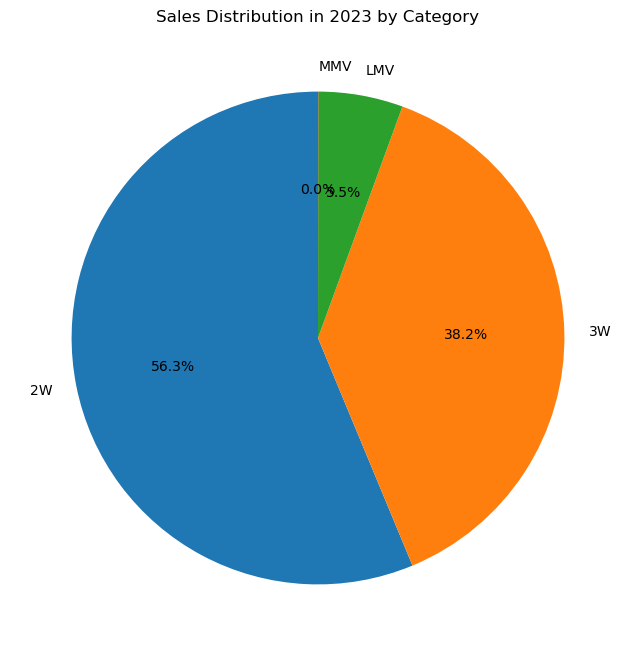

In [53]:
# Pie Chart of Sales Distribution (2023)
# --------------------------------------------
print("\nGenerating sales distribution pie chart for 2023...")


ev_sales_long = pd.melt(ev_sales, id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')


ev_sales_long['Year'] = ev_sales_long['Year'].astype(int)

sales_2023 = ev_sales_long[ev_sales_long['Year'] == 2023]

sales_2023_summary = sales_2023.groupby('Cat')['Sales'].sum()

plt.figure(figsize=(8, 8))
sales_2023_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution in 2023 by Category')
plt.ylabel('')  # Hide the y-axis label
plt.show()
